In [1]:
from monaco import Task, Project

In [4]:
t1 = Task(name='Analysis', est_min=2, est_nom=3, est_max=7)

In [5]:
t2 = Task(name='Experiment', est_min=30, est_nom=35, est_max=40)

In [10]:
t1.estimate(estimator='uniform')

4

In [4]:
p = Project(name='High Score Bypass')

In [5]:
p.add_task(t1)
p.add_task(t2)

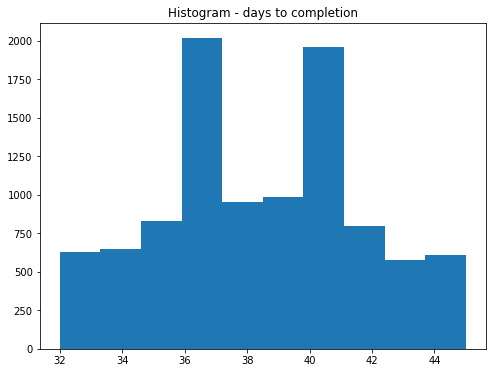

In [6]:
plot_data = p.plot(n=10000)

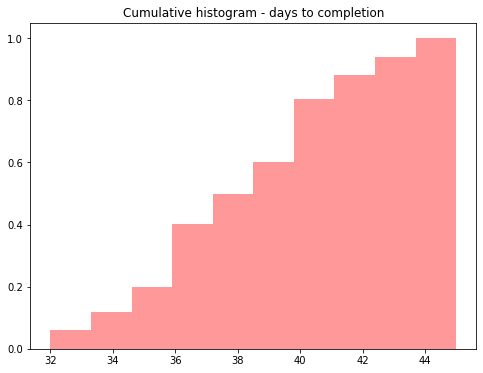

In [7]:
plot_data = p.plot(n=10000, hist=False)